In [3]:
import pandas as pd

# Data Science Example: Population and area of USA states

## 1.) Data loading 

### Read the CSV file with read_csv

In [4]:
df = pd.read_csv('states_full.csv')

### Preview the data
df.head() => show first n rows (default: n=5)

df.tail() => show last n rows (default: n=5)

len() => number of rows

In [5]:
df.head(10) # first 10 rows

,state,area,population
0,Alabama,135775,4888949.0
1,Alaska,1700134,738068.0
2,American Samoa,0,0.0
3,Arizona,295274,7123898.0
4,Arkansas,137741,3020327.0
5,California,423999,39776830.0
6,Colorado,269618,5684203.0
7,Connecticut,14359,3588683.0
8,Delaware,5061,NaN
9,District of Columbia,0,0.0


In [6]:
df.tail() # last 5 rows

,state,area,population
49,Virgin Island,0,0.0
50,Washington,184674,7530552.0
51,West Virginia,62758,1803077.0
52,Wisconsin,169652,5818049.0
53,Wyoming,253348,573720.0


In [7]:
len(df) # how many rows?

54

## 2.) Preprocessing 

**Summary after data preview**
- List contains 54 rows for USA states. But there are only 50 states, right?
- Apparently, USA territorial regions are also included, but they have 0 values in all columns
- There are also NaN values in the population column

### Replace NaNs
We could delete rows with missing values or replace them with some value. This value could be a fixed value, e.g., 5 million or a value computed from other values in that column.

In our case, we decide to replace the NaNs with a rounded average population. The mean() computation ignores the NaNs and we will use that to replace the NaNs.

In [8]:
avg_population = round(df['population'].mean()) # this automatically excludes NaN values. We 
print(f'Computed avg_population: {avg_population}')

# Fill missing values using fillna
df['population'] = df['population'].fillna(avg_population)

df.head(10) # show first 10 lines in DataFrame

Computed avg_population: 6158110


,state,area,population
0,Alabama,135775,4888949.0
1,Alaska,1700134,738068.0
2,American Samoa,0,0.0
3,Arizona,295274,7123898.0
4,Arkansas,137741,3020327.0
5,California,423999,39776830.0
6,Colorado,269618,5684203.0
7,Connecticut,14359,3588683.0
8,Delaware,5061,6158110.0
9,District of Columbia,0,0.0


In [9]:
# Show values as numpy-Array, now we could also access by index 
df['population'].values

array([ 4888949.,   738068.,        0.,  7123898.,  3020327., 39776830.,
        5684203.,  3588683.,  6158110.,        0., 21312211., 10545138.,
        1426393.,  1753860., 12768320.,  6699629.,  3160553.,  2918515.,
        4472265.,  4682509.,  1341582.,  6079602.,  6895917.,  9991177.,
        5628162.,  2982785.,  6158110.,  1062330.,  1932549.,  3056824.,
        1350575.,  9032872.,  2090708., 19862512., 10390149.,   755238.,
       11694664.,  3940521.,  4199563., 12823989.,        0.,  1061712.,
        5088916.,   877790.,  6782564., 28704330.,  3159345.,   623960.,
        8525660.,        0.,  7530552.,  1803077.,  5818049.,   573720.])

### Delete rows with errors
In this case: Delete all the rows with area or population = 0
=> "Select only rows with area and population > 0"

In [12]:
df = df[(df.area > 0) & (df.population > 0)]
df.head(10)

,state,area,population
0,Alabama,135775,4888949.0
1,Alaska,1700134,738068.0
3,Arizona,295274,7123898.0
4,Arkansas,137741,3020327.0
5,California,423999,39776830.0
6,Colorado,269618,5684203.0
7,Connecticut,14359,3588683.0
8,Delaware,5061,6158110.0
10,Florida,170313,21312211.0
11,Georgia,153952,10545138.0


### Prepare additional columns: Population in millions
Rounded on 3 decimal places

In [13]:
df['population_in_mil'] = round(df['population'] / 10**6, 3)
df.head() # show first 5 lines

,state,area,population,population_in_mil
0,Alabama,135775,4888949.0,4.889
1,Alaska,1700134,738068.0,0.738
3,Arizona,295274,7123898.0,7.124
4,Arkansas,137741,3020327.0,3.020
5,California,423999,39776830.0,39.777


### Store the DataFrame after preprocessing
In most cases you want to store the DataFrame after preprocessing. Afterwards you can directly load this dataset and do not have to repeat the preprocessing steps.

In [10]:
df.to_csv('states_full_preprocessed.csv', index=False) # do not store the index in this case

## 3.) Data Exploration

### Loading of the preprocessed DataFrames

In [15]:
df = pd.read_csv('states_full_preprocessed.csv')
df.head() # validate loading by showing first 5 lines

,state,area,population,population_in_mil
0,Alabama,135775,4888949.0,4.889
1,Alaska,1700134,738068.0,0.738
2,Arizona,295274,7123898.0,7.124
3,Arkansas,137741,3020327.0,3.020
4,California,423999,39776830.0,39.777


### Get a "feel" for the value variation in the population column.
Show the minimal and maximal values

In [16]:
pop_min = df['population'].min()
pop_max = df['population'].max()
print(f'Min. Population: {pop_min}')
print(f'Max. Population: {pop_max}')

Min. Population: 573720.0
Max. Population: 39776830.0


### Plot the area data:
We will plot a bar chart.

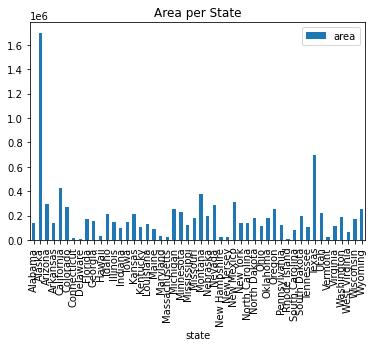

In [17]:
fig_ax = df.plot(x='state', y='area', title='Area per State', kind='bar')

### Summary of data exploration
- The variability in the data is large
    - We checked this with min/max values for population, but there are other measures as well (What did you learn in the statistics class?)
    - ... and for area with a bar chart.

## 4.) Prepare the data and perform computations

### What is the population density pro km² for all states?
Compute the density and add it as a new column. Print the first few rows to test the computation.

In [1]:
# your code goes here

### What is the population density pro mi² for all states?
Compute the density and add it as a new column. Print the first few rows to test the computation.

In [2]:
# your code goes here

### What is the total population and the total area of the USA?

In [3]:
# your code goes here

### What is the percentage of the total population living in California? (Rounded on three decimal places)

In [4]:
# your code goes here

#### What states have less population and area than Austria?
Print also the number and percentage of the states that fulfill this criteria.

Hint: Austria has ~9 million people and area of ~84000 km².

In [5]:
# your code goes here

### What states have "Kansas" in name?
Query should be case-insensitive.

In [7]:
# your code goes here

### Plot a bar chart of states with density larger than 10

In [1]:
# your code goes here